# Exercise

Modify the code as per the below instructions
- Use a different dataset.
- Choose a different embedding like word2vec or gensim, if applicable.
- Modify the architecture, as below
    - Single layer of LSTM and FC
    - Two layers of LSTM and FC
- Change the number of LSTM units in each layer.



# Learning Work Embeddings

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from gensim.models import Word2Vec

In [ ]:
tf.random.set_seed(42)

## 1) Use a different dataset - Reuters is used

In [ ]:
max_features = 20000
(Xtrain, Ytrain), (Xtest, Ytest) = reuters.load_data(num_words=max_features)

# Pad sequences to a fixed length
maxlen = 100
Xtrain = keras.preprocessing.sequence.pad_sequences(Xtrain, maxlen=maxlen)
Xtest = keras.preprocessing.sequence.pad_sequences(Xtest, maxlen=maxlen)



print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))


8982 8982
2246 2246


# 2) Choose a different embedding like word2vec or gensim

In [ ]:
# Get word index from the Reuters dataset
word_index = reuters.get_word_index()

# Train Word2Vec embedding
word2vec_model = Word2Vec(sentences=Xtrain.tolist() + Xtest.tolist(), vector_size=100, window=5, min_count=1, workers=4)
embedding_matrix_word2vec = np.zeros((max_features, 100))
for word, i in word_index.items():
    if i < max_features:
        if word in word2vec_model.wv:
            embedding_matrix_word2vec[i] = word2vec_model.wv[word]

## 3) Modify the architecture of LSTM

In [ ]:
embedding_dim = 100  # Define embedding dimension

# a) Single layer of LSTM and FC
single_layer_model = Sequential([
    Embedding(max_features, embedding_dim, input_length=maxlen, weights=[embedding_matrix_word2vec], trainable=False),
    LSTM(128, dropout=0.2),
    Dense(1, activation='sigmoid')
])

single_layer_model.summary()

# b) Two layers of LSTM and FC
two_layers_model = Sequential([
    Embedding(max_features, embedding_dim, input_length=maxlen, weights=[embedding_matrix_word2vec], trainable=True),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

two_layers_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          2000000   
                                                                 
 lstm_11 (LSTM)              (None, 128)               117248    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2117377 (8.08 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 2000000 (7.63 MB)
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          2000000   
                                                       

In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize.
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing.

# Configure the models for training
single_layer_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
two_layers_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train the model

single_layer_history = single_layer_model.fit(Xtrain, Ytrain, epochs=5, batch_size=128, validation_split=0.2)

two_layers_history = two_layers_model.fit(Xtrain, Ytrain, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
57/57 [==============================] - 21s 330ms/step - loss: -94.4543 - accuracy: 0.0480 - val_loss: -159.9577 - val_accuracy: 0.0456
Epoch 2/5
57/57 [==============================] - 17s 302ms/step - loss: -189.3832 - accuracy: 0.0487 - val_loss: -224.5921 - val_accuracy: 0.0456
Epoch 3/5
57/57 [==============================] - 17s 302ms/step - loss: -250.9243 - accuracy: 0.0487 - val_loss: -285.6697 - val_accuracy: 0.0456
Epoch 4/5
57/57 [==============================] - 19s 343ms/step - loss: -311.4766 - accuracy: 0.0487 - val_loss: -347.3431 - val_accuracy: 0.0456
Epoch 5/5
57/57 [==============================] - 18s 324ms/step - loss: -371.4268 - accuracy: 0.0487 - val_loss: -407.2498 - val_accuracy: 0.0456
Epoch 1/5
57/57 [==============================] - 27s 419ms/step - loss: -58.8442 - accuracy: 0.0480 - val_loss: -101.6421 - val_accuracy: 0.0456
Epoch 2/5
57/57 [==============================] - 24s 415ms/step - loss: -117.5554 - accuracy: 0.0487 - val_loss:

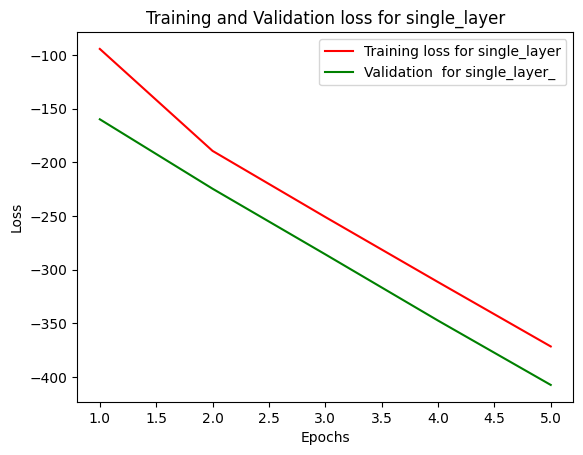

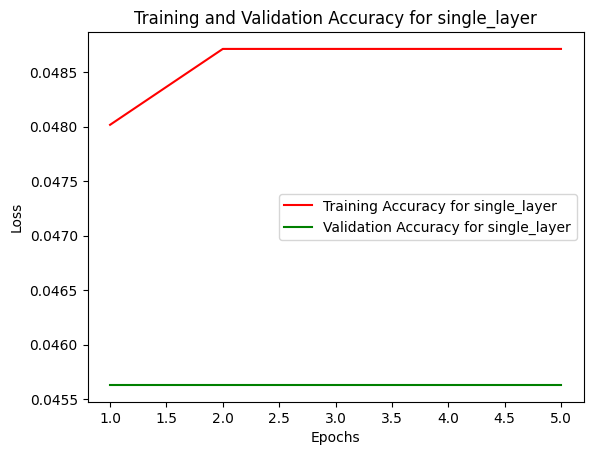

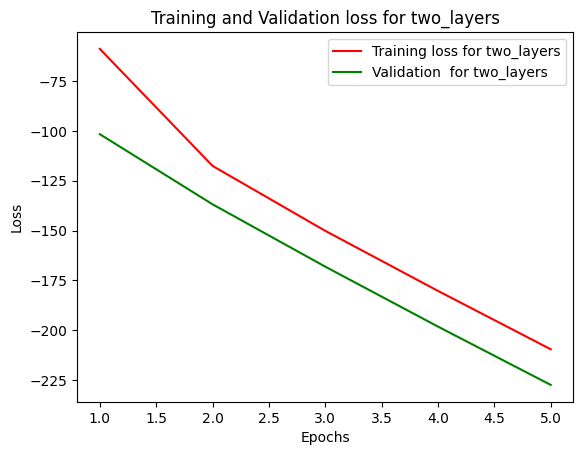

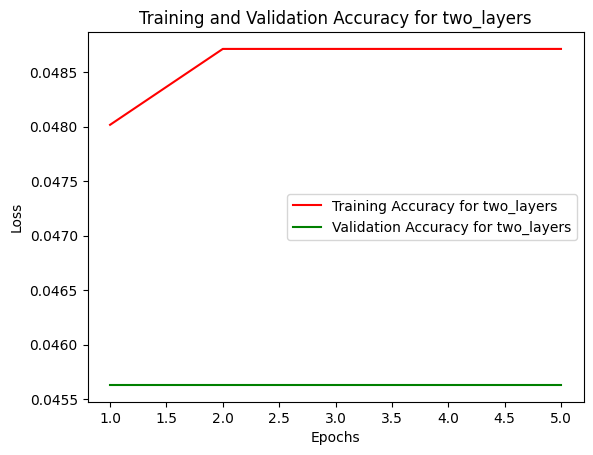

In [ ]:
# plotting training and validation loss for single layer

single_layer_loss = single_layer_history.history['loss']
single_layer_val_loss = single_layer_history.history['val_loss']
epochs = range(1, len(single_layer_loss) + 1)
plt.plot(epochs, single_layer_loss, color='red', label='Training loss for single_layer')
plt.plot(epochs, single_layer_val_loss, color='green', label='Validation  for single_layer')
plt.title('Training and Validation loss for single_layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plotting training and validation Accuracy for single layer

single_layer_acc = single_layer_history.history['accuracy']
single_layer_val_acc = single_layer_history.history['val_accuracy']
epochs = range(1, len(single_layer_loss) + 1)
plt.plot(epochs, single_layer_acc, color='red', label='Training Accuracy for single_layer')
plt.plot(epochs, single_layer_val_acc, color='green', label='Validation Accuracy for single_layer')
plt.title('Training and Validation Accuracy for single_layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plotting training and validation loss for two layers

two_layers_loss = two_layers_history.history['loss']
two_layers_val_loss = two_layers_history.history['val_loss']
epochs = range(1, len(two_layers_loss) + 1)
plt.plot(epochs, two_layers_loss, color='red', label='Training loss for two_layers')
plt.plot(epochs, two_layers_val_loss, color='green', label='Validation  for two_layers')
plt.title('Training and Validation loss for two_layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plotting training and validation Accuracy for two layers

two_layers_acc = two_layers_history.history['accuracy']
two_layers_val_acc = two_layers_history.history['val_accuracy']
epochs = range(1, len(two_layers_loss) + 1)
plt.plot(epochs, two_layers_acc, color='red', label='Training Accuracy for two_layers')
plt.plot(epochs, two_layers_val_acc, color='green', label='Validation Accuracy for two_layers')
plt.title('Training and Validation Accuracy for two_layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the models on test data
single_layer_test_loss, single_layer_test_acc = single_layer_model.evaluate(Xtest, Ytest)
print("Single Layer Test Loss:", single_layer_test_loss)
print("Single Layer Test Accuracy:", single_layer_test_acc)

two_layers_test_loss, two_layers_test_acc = two_layers_model.evaluate(Xtest, Ytest)
print("Two Layers Test Loss:", two_layers_test_loss)
print("Two Layers Test Accuracy:", two_layers_test_acc)

71/71 [==============================] - 4s 61ms/step - loss: -404.4901 - accuracy: 0.0467
Single Layer Test Loss: -404.49005126953125
Single Layer Test Accuracy: 0.0467497780919075
71/71 [==============================] - 2s 31ms/step - loss: -225.9466 - accuracy: 0.0467
Two Layers Test Loss: -225.9465789794922
Two Layers Test Accuracy: 0.0467497780919075
